# Group 27-Louise Foldøy Steffens/Asbjørn Lolk-Hansen

# TASK 2

Importing various libraries

In [2]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
from matplotlib import pyplot as plt
from wordcloud import WordCloud

Reading the csv file with pandas library

In [3]:
data = pd.read_csv('news_sample')
print(data)

     Unnamed: 0     id                domain        type  \
0             0    141               awm.com  unreliable   
1             1    256     beforeitsnews.com        fake   
2             2    700           cnnnext.com  unreliable   
3             3    768               awm.com  unreliable   
4             4    791  bipartisanreport.com   clickbait   
..          ...    ...                   ...         ...   
245         245  39259     beforeitsnews.com        fake   
246         246  39468     beforeitsnews.com        fake   
247         247  39477       www.newsmax.com         NaN   
248         248  39550       www.newsmax.com         NaN   
249         249  39558       www.newsmax.com         NaN   

                                                   url  \
0    http://awm.com/church-congregation-brings-gift...   
1    http://beforeitsnews.com/awakening-start-here/...   
2    http://www.cnnnext.com/video/18526/never-hike-...   
3    http://awm.com/elusive-alien-of-the-sea-ca

Cleaning the data by using the re library and subbing every email, num, date and url with EMAIL, NUM, DATE and URL
Then making all text to lowercase and the seperation only 1 space

In [4]:
def clean_data(text):
    # makes the text a string
    text = str(text) 
    # using regular expression to find dates, urls starting with https, urls starting with /, numbers, emails, line breaks or spaces and special characters and then replacing 
    # them with DATE, URL, NUM, EMAIL, a single space and nothing.
    text = re.sub(r'([a-zA-Z]*.? \d{1,2},? \d{4}|[a-zA-Z]{3}.? \d{4}|\d{1,2}[/-]\d{1,2}[/-]\d{4}|\d{4}[/-]\d{1,2}[/-]\d{1,2})','DATE',text) 
    text = re.sub(r'https?://[w]{0,3}\.?[a-z]+\.[a-z]\w*.*|[w]{3}\.\w+\.\w+\w*.*', 'URL', text)
    text = re.sub(r'([w]{3}\.\w+.\w{3})|https?://', 'URL', text)
    text = re.sub(r'(?:^|(?<=[^\w,.]))[+--]?(([1-9]\d{0,2}(,\d{3})+(\.\d*)?)|([1-9]\d{0,2}([ .]\d{3})+(,\d*)?)|(\d*?[.,]\d+)|\d+)(?:$|(?=\b))', 'NUM', text)
    text = re.sub(r'(?:^|(?<=[^\w@.)]))([\w+-](\.(?!\.))?)*?[\w+-]@(?:\w-?)*?\w+(\.([a-z]{2,})){1,3}(?:$|(?=\b))', 'EMAIL', text)
    text = re.sub(r'(\\n)+|(\\t)+|\s{2,}', ' ', text)
    text = re.sub(r'(\.)*(\,)*(\\)*(/)*(#)*(!)*(\$)*(%)*(\^)*(&)*(\*)*(;)*(:)*({)*(})*(=)*(\–)*(_)*(´)*(\')*(~)*(\()*(\))*(\|)*(\“)*(\?)*(\”)*(\-)*(\@)*(\[)*(\])*', '', text)
    # turns all the text to lowercase letters
    text = text.lower()
    # returns the text
    return text

This code is heavily insired by code from exercise session

Here we use the clean data function to clean every content of the file and then joining them by comma in an empty list

In [26]:
# 
cleaned_data = []
for i in data["content"]:
    cleaned_data.append(clean_data(i))
string_of_contents = " , ".join([content for content in cleaned_data])

['sometimes the power of christmas will make you do wild and wonderful things you do not need to believe in the holy trinity to believe in the positive power of doing good for others the simple act of giving without receiving is lost on many of us these days as worries about money and success hold us back from giving to others who are in need one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve the pastor at grand lake united methodist church in celina ohio gave an emotional sermon about the importance of understanding the message of jesus for many religious people the message of jesus is to help others before yourself to make sure the people who are suffering get the help they need to enjoy life a little bit the sermon was really about generosity and what that can look like in our lives jesus lived a long time ago and he acted generously in the fashion of his time  but what would a generous act look like in our times that was the

We tokenize the cleaned_data list and make the vocabulary by setting the tokens

In [6]:
tokens = nltk.word_tokenize(string_of_contents)
vocab = set(tokens)
print("The size of vocabulary is", len(vocab))

The size of vocabulary is 16636


Now we have the vocabulary without stemming or removing the stopwords

First we gonna remove the stopwords

In [7]:
stopwords = (stopwords.words('english'))
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We take the tokens and remove the stopwords by going over all words and determine that the the word is not in stopwords. If it is then it is not in the new list of tokens.

Then we do the same as before and make a new vocabulary without stopwords

In [8]:
tokens_without_sw = [word for word in tokens if not word in stopwords]
vocab_without_sw = set(tokens_without_sw)

print("The size of the vocabulary without stopwords is ", len(vocab_without_sw))

The size of the vocabulary without stopwords is  16490


Here we can see how many stopwords that were removed in the vocabulary.

We can also see the reduction rate

In [9]:
num_of_removed_vocab = len(vocab) - len(vocab_without_sw)
reduction_rate = (len(vocab) - len(vocab_without_sw))/len(vocab)
print("We have removed the %d stopwords." %num_of_removed_vocab,  
      "The reduction rate of the vocabulary size is %0.3f." %reduction_rate)

We have removed the 146 stopwords. The reduction rate of the vocabulary size is 0.009.


Now we stem the tokens by using the PorterStemmer from the library nltk.

We use the stem function to stem every token in tokens and then set the vocabulary

In [25]:
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in tokens_without_sw]
vocab_after_stemming = set(stemmed_tokens)

We can again calculate the reduction rate after stemming

In [11]:
reduction_rate_after_stemming = (len(vocab) - len(vocab_after_stemming))/len(vocab)
print("The reduction rate of the vocabulary after stemming is %0.3f." %reduction_rate_after_stemming)

The reduction rate of the vocabulary after stemming is 0.322.


Here we count all the numbers of urls, emails, dates and num (the unnessary tokens)

In [12]:
num_url = 0
for i in string_of_contents.split(' '):
    if i == 'url':
        num_url += 1

num_email = 0
for i in string_of_contents.split(' '):
    if i == 'email':
        num_email += 1
        
num_dates = 0 
for i in string_of_contents.split(' '):
    if i == 'date':
        num_dates += 1

num_num = 0
for i in string_of_contents.split(' '):
    if i == 'num':
        num_num += 1

print('This is the number of URLs in the data: %d' %num_url)
print('This is the number of emails in the data: %d' %num_email)
print('This is the number of dates in the data: %d' %num_dates)
print('This is the number of NUM in the data: %d' %num_num)

This is the number of URLs in the data: 224
This is the number of emails in the data: 66
This is the number of dates in the data: 232
This is the number of NUM in the data: 1460


In [13]:
def count_words(vocab, tokens):
    count_word = dict.fromkeys(vocab, 0)
    for i in tokens:
        if i in count_word:
            count_word[i]+=1
    sorted_dict = dict(sorted(count_word.items(),key=lambda x: x[1], reverse=True))
    return sorted_dict

In [14]:
sorted_dict_original = count_words(vocab, tokens)

In [15]:
print('Top 100 most frequent words are:', list(sorted_dict_original.items())[:100])

Top 100 most frequent words are: [('the', 9409), ('of', 4958), ('to', 4874), ('and', 4653), ('a', 3376), ('in', 3102), ('is', 2300), ('that', 2285), ('’', 2284), ('it', 1609), ('for', 1535), ('num', 1466), ('s', 1403), ('you', 1230), ('are', 1226), ('on', 1159), ('with', 1157), ('this', 1143), ('as', 1079), ('i', 995), ('be', 923), ('by', 836), ('have', 788), ('was', 784), ('not', 783), ('at', 704), ('from', 695), ('or', 684), ('we', 678), ('they', 636), ('but', 591), ('your', 555), ('has', 542), ('can', 525), ('an', 519), ('their', 515), ('all', 487), ('will', 486), ('more', 470), ('about', 462), ('what', 448), ('if', 448), ('he', 445), ('us', 444), ('one', 432), ('who', 421), ('there', 416), ('t', 392), ('which', 388), ('so', 387), ('people', 381), ('were', 363), ('our', 361), ('his', 356), ('these', 348), ('been', 345), ('no', 337), ('trump', 335), ('like', 327), ('its', 322), ('would', 321), ('do', 319), ('when', 304), ('time', 291), ('some', 281), ('also', 276), ('up', 271), ('new

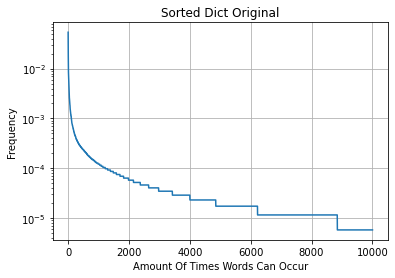

In [16]:
frequencies = list(i/sum(sorted_dict_original.values()) for i in sorted_dict_original.values())
plt.figure()
plt.plot(np.linspace(0,10000,10000),frequencies[:10000])
plt.xlabel('Amount Of Times Words Can Occur')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Sorted Dict Original')
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [17]:
sorted_dict_without_sw = count_words(vocab_without_sw, tokens_without_sw)
print("Top 100 most frequent words that, are not stopwords, are", list(sorted_dict_without_sw.items())[:100])

Top 100 most frequent words that, are not stopwords, are [('’', 2284), ('num', 1466), ('us', 444), ('one', 432), ('people', 381), ('trump', 335), ('like', 327), ('would', 321), ('time', 291), ('also', 276), ('new', 269), ('blockchain', 260), (',', 249), ('date', 235), ('said', 231), ('many', 225), ('url', 224), ('market', 216), ('next', 212), ('even', 211), ('government', 201), ('could', 201), ('think', 197), ('way', 190), ('state', 190), ('president', 186), ('two', 185), ('see', 183), ('first', 181), ('``', 180), ('world', 180), ('life', 177), ("''", 172), ('make', 167), ('may', 165), ('things', 157), ('take', 154), ('get', 151), ('bitcoin', 147), ('years', 147), ('obama', 144), ('much', 142), ('stocks', 141), ('states', 140), ('—', 139), ('fact', 136), ('headline', 135), ('going', 134), ('use', 133), ('exceed', 131), ('well', 131), ('war', 130), ('searches', 130), ('good', 130), ('right', 129), ('year', 127), ('power', 126), ('need', 126), ('back', 125), ('really', 120), ('russia', 1

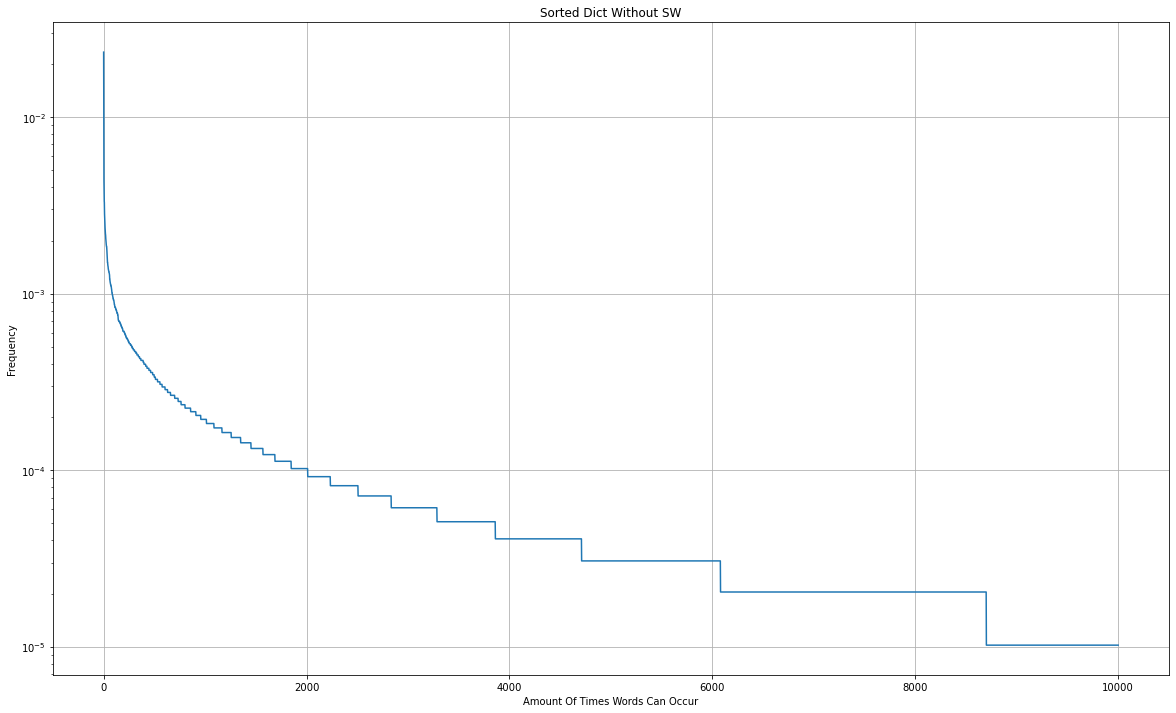

In [18]:
frequencies_without_sw = list(i/sum(sorted_dict_without_sw.values()) for i in sorted_dict_without_sw.values())
plt.figure()
plt.plot(np.linspace(0,10000,10000),frequencies_without_sw[:10000])
plt.xlabel('Amount Of Times Words Can Occur')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('log')
plt.title('Sorted Dict Without SW')
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [19]:
sorted_dict_after_stemming = count_words(vocab_after_stemming, stemmed_tokens)
print("Top 100 most frequent words that, after stemming, are", list(sorted_dict_after_stemming.items())[:100])

Top 100 most frequent words that, after stemming, are [('’', 2284), ('num', 1466), ('one', 462), ('us', 444), ('like', 405), ('time', 392), ('peopl', 387), ('state', 366), ('trump', 348), ('would', 321), ('use', 320), ('market', 295), ('also', 276), ('year', 274), ('new', 269), ('date', 260), ('blockchain', 260), ('make', 258), (',', 249), ('thing', 233), ('go', 232), ('think', 231), ('said', 231), ('way', 227), ('govern', 225), ('mani', 225), ('report', 224), ('url', 224), ('even', 215), ('nation', 213), ('next', 212), ('get', 211), ('take', 211), ('see', 203), ('presid', 202), ('could', 201), ('work', 190), ('say', 189), ('stock', 188), ('american', 186), ('two', 185), ('world', 184), ('need', 183), ('first', 181), ('``', 180), ('life', 177), ('right', 177), ('day', 175), ("''", 172), ('power', 171), ('want', 169), ('may', 165), ('look', 163), ('come', 156), ('help', 156), ('countri', 153), ('bitcoin', 151), ('feel', 150), ('fact', 148), ('war', 148), ('includ', 147), ('person', 147)

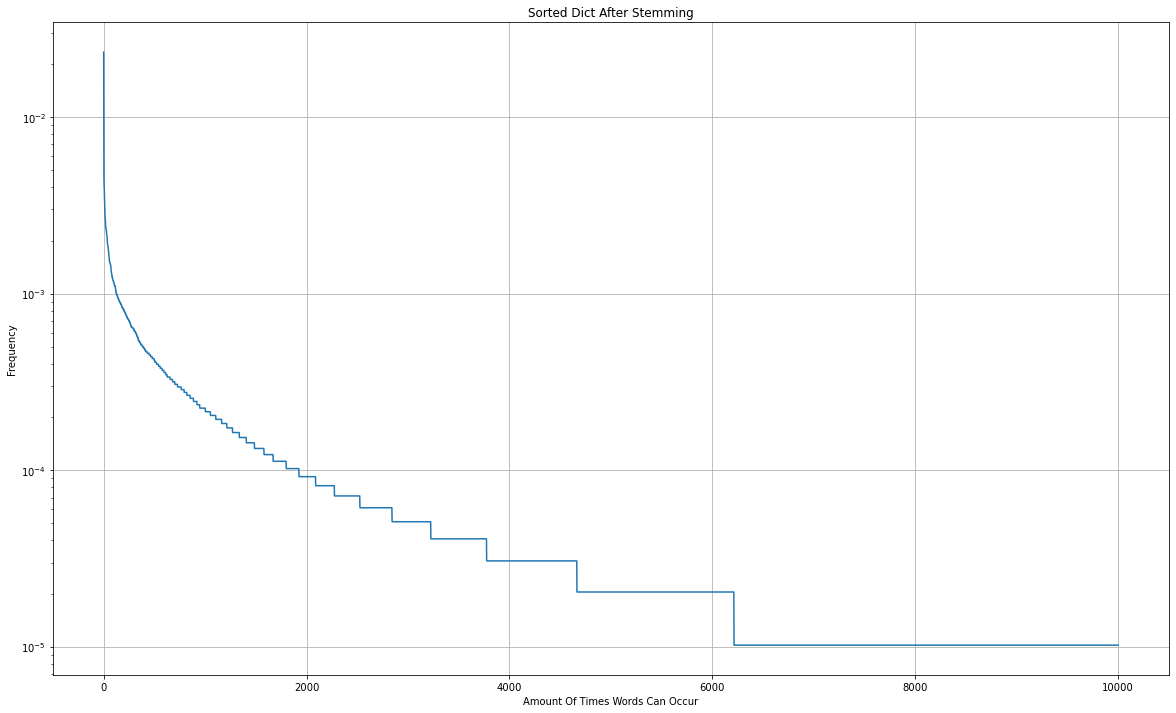

In [20]:
frequencies_after_stemming = list(i/sum(sorted_dict_after_stemming.values()) for i in sorted_dict_after_stemming.values())
plt.figure()
plt.plot(np.linspace(0,10000,10000),frequencies_after_stemming[:10000])
plt.xlabel('Amount Of Times Words Can Occur')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('log')
plt.title('Sorted Dict After Stemming')
plt.grid(True)
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

In [21]:
to_drop = ['keywords','meta_description','tags','summary']

data.drop(to_drop, inplace=True, axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     250 non-null    int64 
 1   id             250 non-null    int64 
 2   domain         250 non-null    object
 3   type           238 non-null    object
 4   url            250 non-null    object
 5   content        250 non-null    object
 6   scraped_at     250 non-null    object
 7   inserted_at    250 non-null    object
 8   updated_at     250 non-null    object
 9   title          250 non-null    object
 10  authors        170 non-null    object
 11  meta_keywords  250 non-null    object
dtypes: int64(2), object(10)
memory usage: 23.6+ KB


In [23]:
data.describe(include=np.object)

,domain,type,url,content,scraped_at,inserted_at,updated_at,title,authors,meta_keywords
count,250,238,250,250,250,250,250,250,170,250
unique,29,10,250,239,2,1,1,248,109,36
top,beforeitsnews.com,fake,http://beforeitsnews.com/press-releases/2017/0...,How To Easily Understand The Difference Betwee...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,2018-02-02 01:19:41.756664,Contributors,John Rolls,['']
freq,155,155,1,9,197,250,250,2,10,211


In [468]:
data.groupby(['type']).count()

,Unnamed: 0,id,domain,url,content,scraped_at,inserted_at,updated_at,title,authors,meta_keywords
type,,,,,,,,,,,
bias,6,6,6,6,6,6,6,6,6,4,6
clickbait,1,1,1,1,1,1,1,1,1,1,1
conspiracy,31,31,31,31,31,31,31,31,31,30,31
fake,155,155,155,155,155,155,155,155,155,104,155
hate,1,1,1,1,1,1,1,1,1,1,1
junksci,6,6,6,6,6,6,6,6,6,2,6
political,23,23,23,23,23,23,23,23,23,18,23
reliable,3,3,3,3,3,3,3,3,3,0,3
unknown,6,6,6,6,6,6,6,6,6,0,6


<AxesSubplot:xlabel='type'>

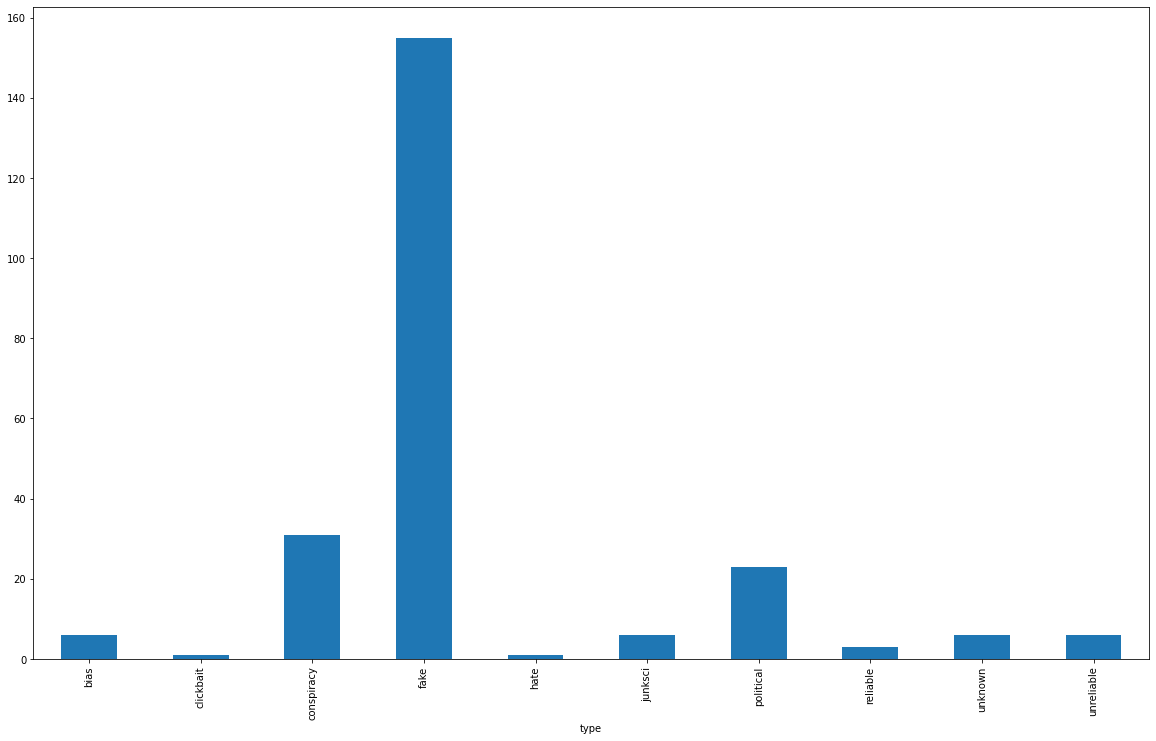

In [430]:
data.groupby(['type'])['id'].count().plot(kind="bar")

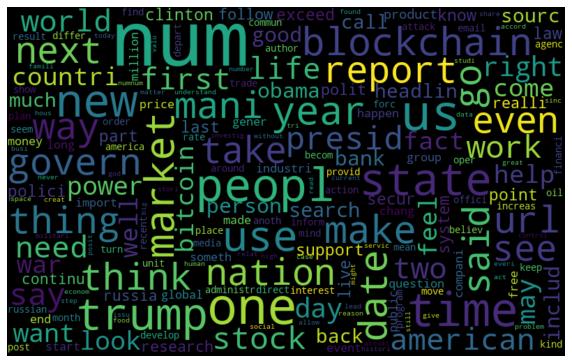

In [583]:
data_from_df = stemmed_tokens
tokens_together = ' '.join([text for text in data_from_df])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(tokens_together)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

*Taken from https://towardsdatascience.com/detecting-fake-news-with-and-without-code-dd330ed449d9

After cleaning the data from the csv file, we looked at the dataframe and saw that there are a few columns with all or a lot of non-null values and therefore removed them from the dataframe

We have done the procedures of first retieving the data from the csv file by using pandas read_csv function. Then we cleaned the data by creating a function that removes all emails, urls, numbers and dates whit use of regular expressions. We could also have cleaned the data by clean-text but we coundn't replace the dates in that function so we used regular expression for everything. Then we tokenized the content by using nltk and created a vocabulary which is the lenght of the list of tokens. After that we removed first stopwords by using nltk again and then stemmed the tokens with also nltk. We counted the words by creating a function count_words that sorts the words into a dictionary from most frequent to least. We did that to the vocabulary with both all words, without stopwords and after stemming. That helped us to find patterns that we can use in Task 3. We illustated the vocabulary using plot from numpy. Lastly we used pandas info function the get some overall info from the dataset and we can another observation for Task 3.

# TASK 3

For Task 3 we were asked to make 3 non-trival observations in patterns of detecting fake news. We looked at our data from the news_sample dataset which is assuming that most of the data is fake and came up with following. We looked at the most frequent words in the dataset and Presidents and Goverment were both in the top 50 of most frequent words. Mentioned that the most of the articles from the dataset is fake then there could be a pattern of fake news when presidents and goverments are mentioned. The second pattern, we think there could be, is the correlation between unknown author and fake news. In the info about the data we see that there are 170 out of 250 missing an author, so could a missing author be a pattern or indecator for fake news. Last we have the pattern of mentioning the stockmarket and bitcoins. This pattern is build on the same speculation on pattern 1 about goverments and presidents. The stockmarket and bitcoin are in the top 100 most used words in the dataset, so there could be a pattern of fake news there.  

As we can see in the table with types of the dataframe, there is a correlation between missing authors and news labeled as fake. Since there is only 104 of 155 with known authors which is the highest of all the types. 
There is also a correlation between politicial and goverment article and fake news. Again we can see that only 23 of 250 articles are labeled politicial, but words like govern, Trump, presid(ent) and Clinton are a few of the top words, which is unlikely to come from only the politicials articles. 
Lastly we have stock, bitcoin and market which is highly featured in the word cloud. Again assuming, that the words wouldn't be mentioned so frequently in the politicial and reliable articles, that makes out 26 of 250 articles, then it must be used a lot in fake news and therefore could be a pattern.

# TASK 4

In [584]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
from urllib.request import urlopen

In [585]:
website = 'https://en.wikinews.org/wiki/Category:Politics_and_conflicts' 
website_url=requests.get(website).text 
soup = BeautifulSoup(website_url,'html.parser')

In [586]:
div = soup.find('div', {'class': 'mw-category-generated'})
children = div.findChildren("a")
all_links = []
for child in children:
    all_links.append(child.text)

print(all_links)

['2005 Political crisis in Brazil', '2006 Israel-Lebanon conflict', '2006 Thailand coup', '2007 Ontario provincial election', '2008 Taiwan Presidential Election', '2011 England riots', '2014 Gaza War', '2014 Libyan conflict', '2019 Hong Kong protests', '30A Protest', '60 Minutes', '9/11', 'Abortion', 'African Union', 'Al-Qaeda', 'Americans Elect', 'Apartheid', 'Arab League', 'Arab Spring', 'ASEAN', 'Australian federal election, 2010', 'Bosnian War', 'Campaign for "santorum" neologism', 'Chief Executive of Hong Kong', 'Civil war', 'COBRA (UK)', 'Conflict-of-interest editing on Wikipedia', 'Cooperation Council for the Arab States of the Gulf', "Don't ask, don't tell", 'Elections', 'ETA', 'Everybody Draw Mohammed Day', 'Foreign and Commonwealth Office', 'Foreign Office (Germany)', 'Former First Ladies of the United States', 'Free speech', 'Freedom of the press', 'G8', 'G8 Summit July 2005', 'Gun politics', 'Hamas', 'Human rights', 'Hustler Magazine v. Falwell', 'Immigration', 'Impeachment

In [587]:
pattern = re.compile('^[D-N]')
(pattern.match(all_links[50]))

match_list = []
t = 0
for i in all_links:
    if pattern.match(all_links[t]) != None:
        match_list.append(all_links[t]) 
    t = t + 1
print(match_list)

["Don't ask, don't tell", 'Elections', 'ETA', 'Everybody Draw Mohammed Day', 'Foreign and Commonwealth Office', 'Foreign Office (Germany)', 'Former First Ladies of the United States', 'Free speech', 'Freedom of the press', 'G8', 'G8 Summit July 2005', 'Gun politics', 'Hamas', 'Human rights', 'Hustler Magazine v. Falwell', 'Immigration', 'Impeachment', 'Impeachment of Donald Trump', 'International aid', 'Iraq War', 'Israel/Palestine Conflict', 'Jundallah (Iran)', 'Legislatures', 'Liberation Tigers of Tamil Eelam', 'Libertarianism', 'Lowy Institute for International Policy', 'Militant groups', 'Military', 'Minuteman Project', 'MST in Brazil', 'Muslim Brotherhood', 'Nationalism', 'NATO', 'Neo-Nazism', 'Non-Aligned Movement', 'Nationalratswahl Österreich 2017 (local).svg']


In [588]:
links_with_text = []
for a in div.find_all('a', href=True): 
    if a.text: 
        links_with_text.append(a['href'])
print(links_with_text)

['/wiki/Category:2005_Political_crisis_in_Brazil', '/wiki/Category:2006_Israel-Lebanon_conflict', '/wiki/Category:2006_Thailand_coup', '/wiki/Category:2007_Ontario_provincial_election', '/wiki/Category:2008_Taiwan_Presidential_Election', '/wiki/Category:2011_England_riots', '/wiki/Category:2014_Gaza_War', '/wiki/Category:2014_Libyan_conflict', '/wiki/Category:2019_Hong_Kong_protests', '/wiki/Category:30A_Protest', '/wiki/Category:60_Minutes', '/wiki/Category:9/11', '/wiki/Category:Abortion', '/wiki/Category:African_Union', '/wiki/Category:Al-Qaeda', '/wiki/Category:Americans_Elect', '/wiki/Category:Apartheid', '/wiki/Category:Arab_League', '/wiki/Category:Arab_Spring', '/wiki/Category:ASEAN', '/wiki/Category:Australian_federal_election,_2010', '/wiki/Category:Bosnian_War', '/wiki/Category:Campaign_for_%22santorum%22_neologism', '/wiki/Category:Chief_Executive_of_Hong_Kong', '/wiki/Category:Civil_war', '/wiki/Category:COBRA_(UK)', '/wiki/Category:Conflict-of-interest_editing_on_Wikipedi

In [589]:
list1 = links_with_text
r = re.compile("/wiki/Category:[D-N]")
group_links = list(filter(r.match, list1)) # Read Note
print(group_links)

['/wiki/Category:Don%27t_ask,_don%27t_tell', '/wiki/Category:Elections', '/wiki/Category:ETA', '/wiki/Category:Everybody_Draw_Mohammed_Day', '/wiki/Category:Foreign_and_Commonwealth_Office', '/wiki/Category:Foreign_Office_(Germany)', '/wiki/Category:Former_First_Ladies_of_the_United_States', '/wiki/Category:Free_speech', '/wiki/Category:Freedom_of_the_press', '/wiki/Category:G8', '/wiki/Category:G8_Summit_July_2005', '/wiki/Category:Gun_politics', '/wiki/Category:Hamas', '/wiki/Category:Human_rights', '/wiki/Category:Hustler_Magazine_v._Falwell', '/wiki/Category:Immigration', '/wiki/Category:Impeachment', '/wiki/Category:Impeachment_of_Donald_Trump', '/wiki/Category:International_aid', '/wiki/Category:Iraq_War', '/wiki/Category:Israel/Palestine_Conflict', '/wiki/Category:Jundallah_(Iran)', '/wiki/Category:Legislatures', '/wiki/Category:Liberation_Tigers_of_Tamil_Eelam', '/wiki/Category:Libertarianism', '/wiki/Category:Lowy_Institute_for_International_Policy', '/wiki/Category:Militant_g

In [590]:
whole_links = []
counter = 0
for link in group_links:
    full_link = 'https://en.wikinews.org' + group_links[counter]
    whole_links.append(full_link)
    counter = counter + 1
    
print(whole_links)

['https://en.wikinews.org/wiki/Category:Don%27t_ask,_don%27t_tell', 'https://en.wikinews.org/wiki/Category:Elections', 'https://en.wikinews.org/wiki/Category:ETA', 'https://en.wikinews.org/wiki/Category:Everybody_Draw_Mohammed_Day', 'https://en.wikinews.org/wiki/Category:Foreign_and_Commonwealth_Office', 'https://en.wikinews.org/wiki/Category:Foreign_Office_(Germany)', 'https://en.wikinews.org/wiki/Category:Former_First_Ladies_of_the_United_States', 'https://en.wikinews.org/wiki/Category:Free_speech', 'https://en.wikinews.org/wiki/Category:Freedom_of_the_press', 'https://en.wikinews.org/wiki/Category:G8', 'https://en.wikinews.org/wiki/Category:G8_Summit_July_2005', 'https://en.wikinews.org/wiki/Category:Gun_politics', 'https://en.wikinews.org/wiki/Category:Hamas', 'https://en.wikinews.org/wiki/Category:Human_rights', 'https://en.wikinews.org/wiki/Category:Hustler_Magazine_v._Falwell', 'https://en.wikinews.org/wiki/Category:Immigration', 'https://en.wikinews.org/wiki/Category:Impeachmen

In [591]:
links_from_subcategories = []
for url in whole_links:
    #getting urls from the links in the list
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    #finding where the links to the article are
    div = soup.find('div', {'class': 'mw-category-generated'})
    children = div.findChildren("a")
    
    for a in div.find_all('a', href=True): 
        if a.text: 
            links_from_subcategories.append(a['href'])
    
print(links_from_subcategories)

['/wiki/Death_of_4000th_U.S._soldier_in_Iraq_shines_spotlight_on_gays_in_the_military', '/wiki/Department_of_Defense_denies_federal_funding_to_schools_that_ban_military_recruiting', '/wiki/General_Petraeus:_Fight_for_Afghan_town_Marja_is_%27just_the_initial_operation%27', '/wiki/Obama_signs_landmark_law_overturning_%27don%27t_ask,_don%27t_tell%27', '/wiki/Obama%27s_first_State_of_the_Union_speech_focuses_on_economy,_jobs', '/wiki/Pentagon_%27don%27t_ask_don%27t_tell%27_poll_shows_support_for_repeal', '/wiki/US_supports_UN_gay_rights_declaration', '/wiki/US_Supreme_Court_nominee_Elena_Kagan_meets_with_senators_on_Capitol_Hill', '/wiki/Wikinews_interviews_John_Wolfe,_Democratic_Party_presidential_challenger_to_Barack_Obama', '/wiki/Category:2005_Egypt_Elections', '/wiki/Category:2005_Iran_Elections', '/wiki/Category:2007_French_presidential_election', '/wiki/Category:2008_United_States_federal_elections', '/wiki/Category:2008_United_States_presidential_election', '/wiki/Category:2009_Afg

In [592]:
whole_links_2 = []
counter = 0
for link in links_from_subcategories:
    new_links = 'https://en.wikinews.org' + links_from_subcategories[counter]
    whole_links_2.append(new_links)
    counter = counter + 1
    
print(whole_links_2)

['https://en.wikinews.org/wiki/Death_of_4000th_U.S._soldier_in_Iraq_shines_spotlight_on_gays_in_the_military', 'https://en.wikinews.org/wiki/Department_of_Defense_denies_federal_funding_to_schools_that_ban_military_recruiting', 'https://en.wikinews.org/wiki/General_Petraeus:_Fight_for_Afghan_town_Marja_is_%27just_the_initial_operation%27', 'https://en.wikinews.org/wiki/Obama_signs_landmark_law_overturning_%27don%27t_ask,_don%27t_tell%27', 'https://en.wikinews.org/wiki/Obama%27s_first_State_of_the_Union_speech_focuses_on_economy,_jobs', 'https://en.wikinews.org/wiki/Pentagon_%27don%27t_ask_don%27t_tell%27_poll_shows_support_for_repeal', 'https://en.wikinews.org/wiki/US_supports_UN_gay_rights_declaration', 'https://en.wikinews.org/wiki/US_Supreme_Court_nominee_Elena_Kagan_meets_with_senators_on_Capitol_Hill', 'https://en.wikinews.org/wiki/Wikinews_interviews_John_Wolfe,_Democratic_Party_presidential_challenger_to_Barack_Obama', 'https://en.wikinews.org/wiki/Category:2005_Egypt_Elections'

In [593]:
list_of_text = []
for url in whole_links_2:
    list_with_text = []
    #getting urls from the links in the list
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    
    div = soup.find('div', {'class': 'mw-parser-output'})
    children = div.findChildren("p")
    
    for a in children: 
        text = a.text 
        list_with_text.append(text)
    string_of_content = " ".join(list_with_text)
    list_of_text.append(string_of_content)


index = string_of_content.find('Have an opinion on this story? Share it!')
list_of_article.append(string_of_content[0:index])

In [594]:
dates = []
for url in whole_links_2:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    div = soup.find('div', {'class': 'mw-parser-output'})
    children = div.findChildren("strong")
    strr = str(children)
    ind = strr.find(r'></span>')
    dates.append(strr[ind+8:len(strr)-10])
print(dates)

['Wednesday, April 9, 2008', 'Thursday, June 2, 2005', 'Tuesday, February 23, 2010', 'Thursday, December 23, 2010', 'Thursday, January 28, 2010', 'Thursday, December 2, 2010', 'Thursday, March 19, 2009', 'Thursday, May 13, 2010', 'Sunday, May 20, 2012', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Sunday, August 16, 2015', 'Wednesday, November 8, 2006', 'Sunday, April 15, 2007', 'Thursday, May 6, 2010', 'Thursday, November 23, 2006', 'Monday, January 10, 2005', 'Sunday, August 23, 2009', 'Wednesday, August 26, 2009', 'Saturday, October 31, 2009', 'Sunday, November 1, 2009', 'Tuesday, September 8, 2009', 'Saturday, September 26, 2009', 'Monday, October 26, 2009', 'Saturday, April 5, 2014', 'Thursday, March 20, 2008', 'Tuesday, June 30, 2009', 'Wednesday, July 15, 2009', 'Thursday, March 24, 2005', 'Sunday, April 3, 2005', 'Thursday, March 31, 2005', 'Wednesday, May 2, 2007', 'Monday, July 23, 2007', 'Monday, February 11, 2008', 'Thursday, Dece

In [595]:
print(list_of_text[2])

Tuesday, February 23, 2010 
 General David Petraeus, the U.S. general who oversees the war in Afghanistan, says the fight for the southern town of Marja — called Operation Moshtarak — is just the first operation in a long campaign.   
 Petraeus says the battle of Marja is just the beginning. "This is just the initial operation of what will be a 12- to 18-month campaign, as General [Stanley] McChrystal and his team have mapped it out," he said.
 During an appearance on NBC's Meet the Press, Petraeus said the enemy is formidable. He did not predict how long the operation in Marja, a traditional Taliban stronghold, would continue. He said only that the fighting is tough. "When we go on the offensive, when we take away sanctuaries and safe havens from the Taliban and the other extremist elements that we and our Afghan and coalition partners are fighting in that country, they are going to fight back. And we are seeing that in Marjah. We will see that in other areas," he said.
 The general s

In [596]:
records = []
w = 0
for data in whole_links_2:
    url = whole_links_2[w]
    content = list_of_text[w]
    date = dates[w]
    records.append((content,date,url))
    w = w + 1
df = pd.DataFrame(records, columns=['Content', 'DATE', 'URL'])

print(df)

                                                Content  \
0     Wednesday, April 9, 2008 \n The January occasi...   
1     Thursday, June 2, 2005 \n The U.S. Defense Dep...   
2     Tuesday, February 23, 2010 \n General David Pe...   
3     Thursday, December 23, 2010 \n United States P...   
4     Thursday, January 28, 2010 \n In his first ann...   
...                                                 ...   
1878  Friday, August 31, 2012 \n Egyptian President ...   
1879  Saturday, June 26, 2010  Fijian Prime Minister...   
1880  Tuesday, April 26, 2005 \n The heads of state ...   
1881  Sunday, September 17, 2006 \n Prime Minister o...   
1882  Thursday, June 2, 2005 \n The month-long 2005 ...   

                             DATE  \
0        Wednesday, April 9, 2008   
1          Thursday, June 2, 2005   
2      Tuesday, February 23, 2010   
3     Thursday, December 23, 2010   
4      Thursday, January 28, 2010   
...                           ...   
1878      Friday, August 31, 201

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  1883 non-null   object
 1   DATE     1883 non-null   object
 2   URL      1883 non-null   object
dtypes: object(3)
memory usage: 44.3+ KB


We used beautifulsoup to gather the html from the first wiki website. Then we inspected the webpage for the links in subcategories. We found the parent div where all the links are and then seached for its children with the tag a. When we got all the links and we appended it to a list and then used regular expression to extract the links from D to N. We noticed that the links didn't have the first part of the link "http//:en.wikinews.org" so we went through all the extracted links and applied it to them. Now we were able to get the content from the links with request and beautifulsoup. We did the same thing for the links on those websites and used regular expression again to get those articles from D-N. Then we opened those links by for loop and extracted the text in the articles by using find all p tags and then append the text to a list. Because of the links nested into the text, we had to place all elements of the list of strings that we got from the p tags in the article in a new list where it was joined by the function join. We did that for all articles which gave us 627 elements, which is corresponding to the number of links and dates.

We made a dataframe for all articles, urls and dates. We did it by a for loop with a counter. We took the first element in the lists url, dates and content and then append together in a list and repeated until we reached the end of the list. We could make the dataframe from the new list containing all data grouped by element and then make the columns fit each type of data.

There is 627 articles (627 rows), where we made 3 columns each corresponding to the data. We have no missing values which we can see in the df.info.

Since wikinews can be edited by anyone without supervision then we can't trust it to be a reliable source for information.

In [598]:
df.drop_duplicates()

,Content,DATE,URL
0,"Wednesday, April 9, 2008 \n The January occasi...","Wednesday, April 9, 2008",https://en.wikinews.org/wiki/Death_of_4000th_U...
1,"Thursday, June 2, 2005 \n The U.S. Defense Dep...","Thursday, June 2, 2005",https://en.wikinews.org/wiki/Department_of_Def...
2,"Tuesday, February 23, 2010 \n General David Pe...","Tuesday, February 23, 2010",https://en.wikinews.org/wiki/General_Petraeus:...
3,"Thursday, December 23, 2010 \n United States P...","Thursday, December 23, 2010",https://en.wikinews.org/wiki/Obama_signs_landm...
4,"Thursday, January 28, 2010 \n In his first ann...","Thursday, January 28, 2010",https://en.wikinews.org/wiki/Obama%27s_first_S...
...,...,...,...
1877,"Tuesday, February 19, 2008 \n While nearly all...","Tuesday, February 19, 2008",https://en.wikinews.org/wiki/Wikinews_intervie...
1879,"Saturday, June 26, 2010 Fijian Prime Minister...","Saturday, June 26, 2010",https://en.wikinews.org/wiki/Fiji_joins_the_No...
1880,"Tuesday, April 26, 2005 \n The heads of state ...","Tuesday, April 26, 2005","https://en.wikinews.org/wiki/Historic_summit,_..."
1881,"Sunday, September 17, 2006 \n Prime Minister o...","Sunday, September 17, 2006","https://en.wikinews.org/wiki/India,_Pakistan_d..."
